[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Stef0916/chemoinformatics-bioinformatics/blob/main/cheminformatics-workflow/notebooks/7-Most_common_substracture.ipynb)

# Most commom substructure (MCS)

It is the biggest connected fragment that is shared between two or several chemical compounds. MCS is widely used for SAR analysis, particularly for Matched molecular paired analysis and scaffold elucidation.



## Content

1. [Import Libraries](#1)
2. [Load Data](#2)
3. [Get the MCS between 2 molecules](#3)
4. [Get the MCS between 1 molecule and a Dataset](#4)
    - 4.1 [Option 1: for loop](#5)
    - 4.2 [Option 1: define a function](#6)
5. [Bermis-Murcko Scaffolds](#7)
    - 5.1 [BM between 2 molecules](#8)

## 1. Import Libraries<a name = 1></a>

In [1]:
!pip install rdkit

In [2]:
!pip install mols2grid

In [3]:
import pandas as pd
import numpy as np
from rdkit import Chem, DataStructs
from rdkit.Chem.Draw import IPythonConsole, MolsToGridImage
from rdkit.Chem import Draw, PandasTools, AllChem, rdFMCS
from rdkit.Chem import rdDepictor
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem.Scaffolds import MurckoScaffold
IPythonConsole.ipython_useSVG = True
rdDepictor.SetPreferCoordGen(True)
import mols2grid

import rdkit
rdkit.__version__

'2023.09.1'

## 2. Load Data<a name = 2></a>

In [4]:
data = PandasTools.LoadSDF('AID_1259247_sanitized.sdf', molColName='Molecule')

,PUBCHEM_SMILES,PUBCHEM_ACTIVITY_OUTCOME,Antagonist Activity,Viability Activity,Antagonist Efficacy (%),ID,Molecule
0,CN1C2=NC=NC3=C2C(=CN3[C@H]4[C@@H]([C@@H]([C@H]...,Active,active antagonist,inactive,-37.5702,,
1,C[C@]12CC[C@H]3C(=CCC4=C3C=CC(=C4)O)[C@@H]1CCC2=O,Active,active antagonist,inactive,-37.9252,,
2,C1=NC2=C(N=C(N=C2N1[C@H]3[C@H]([C@@H]([C@H](O3...,Active,active antagonist,inactive,-35.847,,
3,CCOC1=CC2=C(C3=C(C=C(C=C3)N)N=C2C=C1)N.CC(C(=O...,Active,active antagonist,inactive,-35.5194,,
4,CCCCOC(=O)C1=CC=CC=C1C(=O)OCC2=CC=CC=C2,Active,active antagonist,inactive,-39.4007,,
...,...,...,...,...,...,...,...
5129,C(/C=C\Cl)Cl,Inactive,inactive,inactive,0.0,,
5130,CC(C)OP(OC(C)C)OC(C)C,Inactive,inactive,inactive,0.0,,
5131,C1CCSC1,Inactive,inactive,inactive,0.0,,
5132,CN(CCCC(C1=CN=CC=C1)O)N=O,Inactive,inactive,inactive,0.0,,

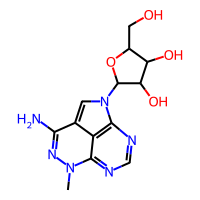
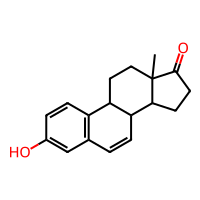
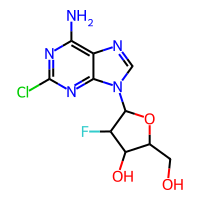
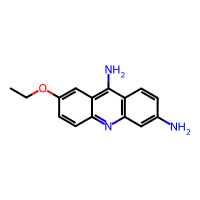
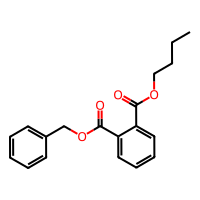
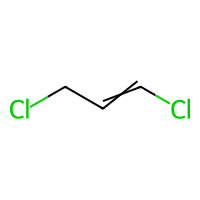
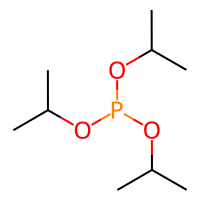
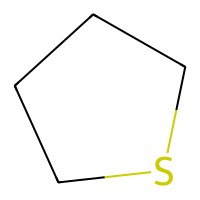
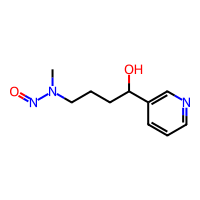
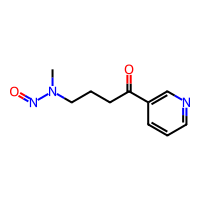

In [5]:
data

In [6]:
data['Antagonist Efficacy (%)'] = data['Antagonist Efficacy (%)'].astype('float64')

## 3. Get the MCS between 2 molecules<a name = 3></a>

In [7]:
# Get the MCS between two molecules
mols = [data['Molecule'][0], data['Molecule'][1]]
MCS_results1 = rdFMCS.FindMCS(mols,
                             atomCompare=rdFMCS.AtomCompare.CompareElements,
                             bondCompare=rdFMCS.BondCompare.CompareOrder,
                             ringMatchesRingOnly=True,
                             completeRingsOnly=True,

                             #  ringCompare = rdFMCS.ringCompare.IgnoreRingFusion,
                             #  matchValences=True,
                             #  matchChiralTag=True
                              )

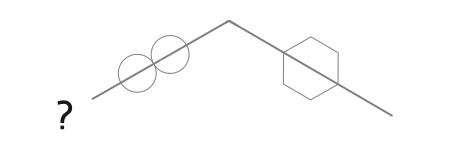

In [8]:
Chem.MolFromSmarts(MCS_results1.smartsString)

In [9]:
MCS_results1.smartsString

'[#6&!R]-&!@[#6&R]-&@[#6&R]'

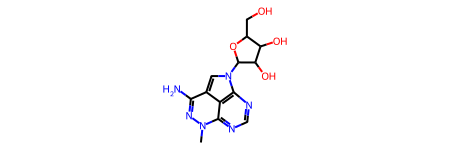

In [10]:
data['Molecule'][0]

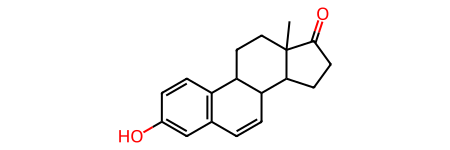

In [11]:
data['Molecule'][1]

If we go with the default parameters of the `rdFMCS.FindMCS`, then, a more lose search will be performed.

In [12]:
# Get the MCS between two molecules
mols = [data['Molecule'][0], data['Molecule'][1]]
MCS_results2 = rdFMCS.FindMCS(mols,
                            #  atomCompare=rdFMCS.AtomCompare.CompareElements,
                            #  bondCompare=rdFMCS.BondCompare.CompareOrder,
                            #  ringMatchesRingOnly=True,
                            #  completeRingsOnly=True,

                            #   ringCompare = rdFMCS.ringCompare.IgnoreRingFusion,
                            #   matchValences=True,
                            #   matchChiralTag=True
                              )

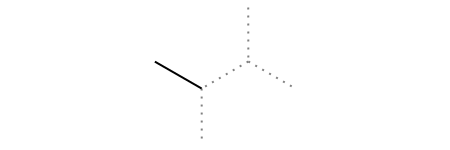

In [13]:
Chem.MolFromSmarts(MCS_results2.smartsString)

## 4. Get the MCS between 1 molecule and a Dataset<a name = 4></a>

### 4.1 Option 1: for loop<a name = 5></a>

In [14]:
molecule_0 = data['Molecule'][0]  # The first molecule to compare with the rest

MCS_mol = []
MCS_atoms = []

for i in range(0, len(data)):
    mols_to_compare = [molecule_0, data['Molecule'][i]]

    MCS_result = rdFMCS.FindMCS(mols_to_compare,
                                atomCompare=rdFMCS.AtomCompare.CompareElements,
                                bondCompare=rdFMCS.BondCompare.CompareOrder,
                                ringMatchesRingOnly=True,
                                completeRingsOnly=True
                                # Additional parameters can be uncommented as needed
                                # ringCompare=rdFMCS.RingCompare.IgnoreRingFusion,
                                # matchValences=True,
                                # matchChiralTag=True
                                )
    smarts = MCS_result.smartsString
    if smarts:
        mol = Chem.MolFromSmarts(smarts)
        MCS_mol.append(mol)
        MCS_atoms.append(mol.GetNumAtoms())
    else:
        MCS_mol.append(None)
        MCS_atoms.append(0)

,PUBCHEM_SMILES,PUBCHEM_ACTIVITY_OUTCOME,Antagonist Activity,Viability Activity,Antagonist Efficacy (%),ID,Molecule,MCS
0,CN1C2=NC=NC3=C2C(=CN3[C@H]4[C@@H]([C@@H]([C@H]...,Active,active antagonist,inactive,-37.5702,,,
1,C[C@]12CC[C@H]3C(=CCC4=C3C=CC(=C4)O)[C@@H]1CCC2=O,Active,active antagonist,inactive,-37.9252,,,
2,C1=NC2=C(N=C(N=C2N1[C@H]3[C@H]([C@@H]([C@H](O3...,Active,active antagonist,inactive,-35.8470,,,
3,CCOC1=CC2=C(C3=C(C=C(C=C3)N)N=C2C=C1)N.CC(C(=O...,Active,active antagonist,inactive,-35.5194,,,
4,CCCCOC(=O)C1=CC=CC=C1C(=O)OCC2=CC=CC=C2,Active,active antagonist,inactive,-39.4007,,,
...,...,...,...,...,...,...,...,...
5129,C(/C=C\Cl)Cl,Inactive,inactive,inactive,0.0000,,,
5130,CC(C)OP(OC(C)C)OC(C)C,Inactive,inactive,inactive,0.0000,,,
5131,C1CCSC1,Inactive,inactive,inactive,0.0000,,,None
5132,CN(CCCC(C1=CN=CC=C1)O)N=O,Inactive,inactive,inactive,0.0000,,,

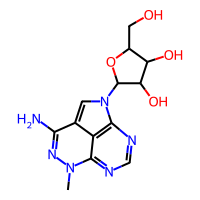
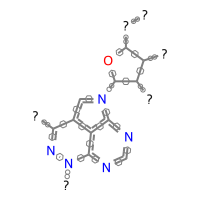
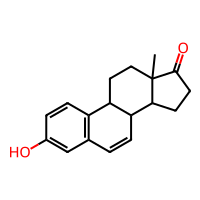
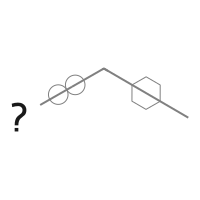
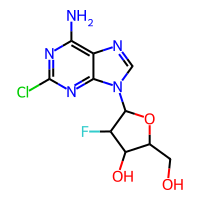
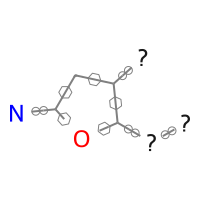
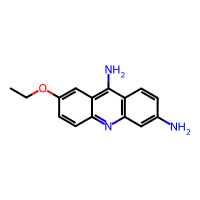
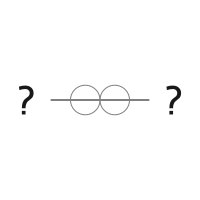
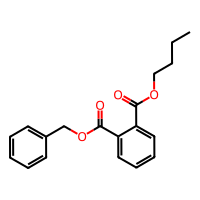
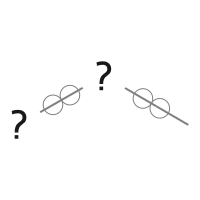
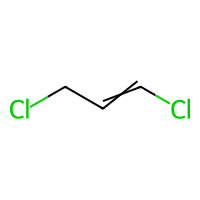
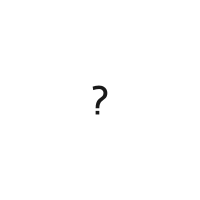
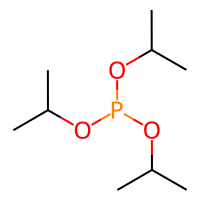
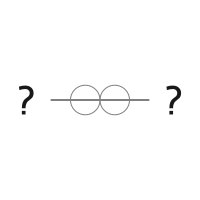
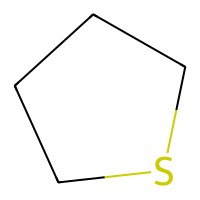
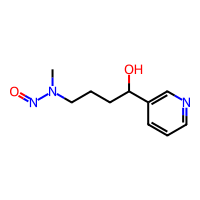
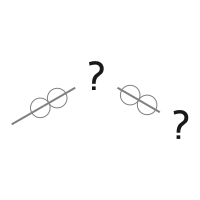
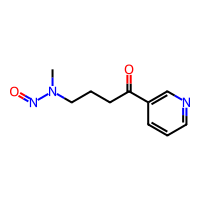
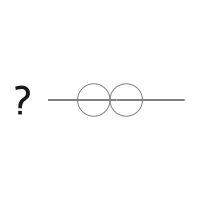

In [15]:
data['MCS'] = MCS_mol
data

In [16]:
data['MCS#atoms'] = MCS_atoms
data.sort_values(by='MCS#atoms', ascending=False)

,PUBCHEM_SMILES,PUBCHEM_ACTIVITY_OUTCOME,Antagonist Activity,Viability Activity,Antagonist Efficacy (%),ID,Molecule,MCS,MCS#atoms
0,CN1C2=NC=NC3=C2C(=CN3[C@H]4[C@@H]([C@@H]([C@H]...,Active,active antagonist,inactive,-37.5702,,<rdkit.Chem.rdchem.Mol object at 0x78f4a646a2d0>,<rdkit.Chem.rdchem.Mol object at 0x78f4a5c22730>,23
451,CC(=O)OC[C@@H]1[C@H]([C@H]([C@@H](O1)N2C(=O)NC...,Inactive,inactive,inactive,0.0000,,<rdkit.Chem.rdchem.Mol object at 0x78f4a621e5e0>,<rdkit.Chem.rdchem.Mol object at 0x78f4a5f635a0>,10
1758,C1=CN(C(=O)N=C1N)[C@H]2[C@H]([C@@H]([C@H](O2)C...,Inactive,inactive,inactive,0.0000,,<rdkit.Chem.rdchem.Mol object at 0x78f4a5fd1230>,<rdkit.Chem.rdchem.Mol object at 0x78f4a600ef80>,10
1399,CNC(=O)C1=CN(N=C1)C2=NC(=C3C(=N2)N(C=N3)[C@H]4...,Inactive,inactive,inactive,0.0000,,<rdkit.Chem.rdchem.Mol object at 0x78f4a6152110>,<rdkit.Chem.rdchem.Mol object at 0x78f4a5fe9620>,10
1396,CC1=CC2=C(C=C1C)N(C=N2)[C@@H]3[C@@H]([C@@H]([C...,Inactive,inactive,inactive,0.0000,,<rdkit.Chem.rdchem.Mol object at 0x78f4a6151fc0>,<rdkit.Chem.rdchem.Mol object at 0x78f4a5fe9460>,10
...,...,...,...,...,...,...,...,...,...
1768,C1=CC(=C(C=C1Cl)Cl)Cl,Inactive,inactive,inactive,0.0000,,<rdkit.Chem.rdchem.Mol object at 0x78f4a5fd1700>,None,0
2216,P#[In],Inactive,inactive,inactive,0.0000,,<rdkit.Chem.rdchem.Mol object at 0x78f4a604b290>,None,0
3445,C1=CC(=C(C=C1Br)Br)Br,Inactive,inactive,inactive,0.0000,,<rdkit.Chem.rdchem.Mol object at 0x78f4a5ddec70>,None,0
1797,C1=CN=CC=C1C2=CC=NC=C2,Inactive,inactive,inactive,0.0000,,<rdkit.Chem.rdchem.Mol object at 0x78f4a5fd2730>,None,0


In [17]:
filtered_mol = data.loc[data['MCS#atoms'] >= 10]
filtered_mol

,PUBCHEM_SMILES,PUBCHEM_ACTIVITY_OUTCOME,Antagonist Activity,Viability Activity,Antagonist Efficacy (%),ID,Molecule,MCS,MCS#atoms
0,CN1C2=NC=NC3=C2C(=CN3[C@H]4[C@@H]([C@@H]([C@H]...,Active,active antagonist,inactive,-37.5702,,<rdkit.Chem.rdchem.Mol object at 0x78f4a646a2d0>,<rdkit.Chem.rdchem.Mol object at 0x78f4a5c22730>,23
451,CC(=O)OC[C@@H]1[C@H]([C@H]([C@@H](O1)N2C(=O)NC...,Inactive,inactive,inactive,0.0000,,<rdkit.Chem.rdchem.Mol object at 0x78f4a621e5e0>,<rdkit.Chem.rdchem.Mol object at 0x78f4a5f635a0>,10
625,C1=NC(=C(N1[C@H]2[C@@H]([C@@H]([C@H](O2)CO)O)O...,Inactive,inactive,inactive,0.0000,,<rdkit.Chem.rdchem.Mol object at 0x78f4a6243c30>,<rdkit.Chem.rdchem.Mol object at 0x78f4a5f800b0>,10
874,C1=NC(=C2C(=N1)N(C=N2)[C@H]3[C@@H]([C@@H]([C@H...,Inactive,inactive,inactive,0.0000,,<rdkit.Chem.rdchem.Mol object at 0x78f4a6097ae0>,<rdkit.Chem.rdchem.Mol object at 0x78f4a5faadc0>,10
963,C1=NC(=C(N1[C@H]2[C@@H]([C@@H]([C@H](O2)CO)O)O...,Inactive,inactive,inactive,0.0000,,<rdkit.Chem.rdchem.Mol object at 0x78f4a60c2dc0>,<rdkit.Chem.rdchem.Mol object at 0x78f4a5fb9620>,10
1142,C1=NC(=C2C(=N1)N(C=N2)[C@H]3[C@@H]([C@@H]([C@H...,Inactive,inactive,inactive,0.0000,,<rdkit.Chem.rdchem.Mol object at 0x78f4a6105310>,<rdkit.Chem.rdchem.Mol object at 0x78f4a5fc6490>,10
1396,CC1=CC2=C(C=C1C)N(C=N2)[C@@H]3[C@@H]([C@@H]([C...,Inactive,inactive,inactive,0.0000,,<rdkit.Chem.rdchem.Mol object at 0x78f4a6151fc0>,<rdkit.Chem.rdchem.Mol object at 0x78f4a5fe9460>,10
1399,CNC(=O)C1=CN(N=C1)C2=NC(=C3C(=N2)N(C=N3)[C@H]4...,Inactive,inactive,inactive,0.0000,,<rdkit.Chem.rdchem.Mol object at 0x78f4a6152110>,<rdkit.Chem.rdchem.Mol object at 0x78f4a5fe9620>,10
1758,C1=CN(C(=O)N=C1N)[C@H]2[C@H]([C@@H]([C@H](O2)C...,Inactive,inactive,inactive,0.0000,,<rdkit.Chem.rdchem.Mol object at 0x78f4a5fd1230>,<rdkit.Chem.rdchem.Mol object at 0x78f4a600ef80>,10
2350,C1=CN(C(=O)N=C1N)[C@H]2[C@H]([C@@H]([C@H](O2)C...,Inactive,inactive,inactive,0.0000,,<rdkit.Chem.rdchem.Mol object at 0x78f4a607b1b0>,<rdkit.Chem.rdchem.Mol object at 0x78f4a604ed50>,10


In [18]:
legend = [f'Molecule {i}' for i in filtered_mol.index]

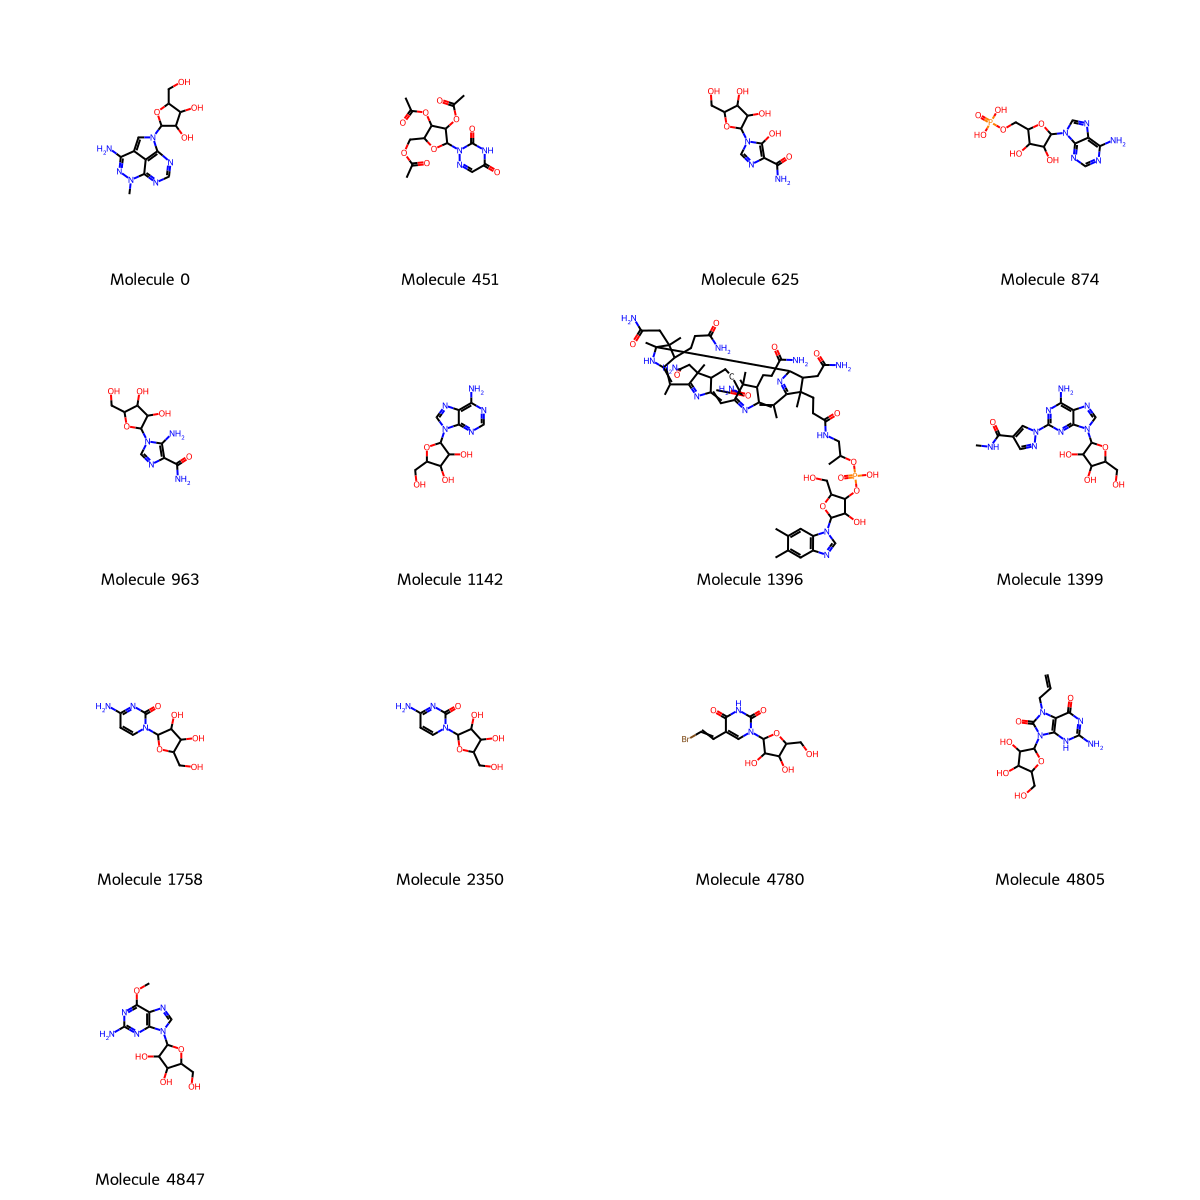

In [19]:
img = Draw.MolsToGridImage(filtered_mol['Molecule'],
                           molsPerRow=4,
                           subImgSize=(300,300),
                           legends=legend
                           )
img

In [20]:
svg = img.data
with open('MCS.svg', 'w') as svg_file:
    svg_file.write(svg)

### 4.2 Option 2: define a function<a name = 6></a>

In [21]:
def MCS(reference_mol, target_mol):
    mcs_results= rdFMCS.FindMCS((reference_mol, target_mol),
                   atomCompare=rdFMCS.AtomCompare.CompareElements,
                   bondCompare=rdFMCS.BondCompare.CompareOrder,
                   ringMatchesRingOnly=True,
                   completeRingsOnly=True,

                   #  ringCompare = rdFMCS.ringCompare.IgnoreRingFusion,
                   #  matchValences=True,
                   #  matchChiralTag=True
                   )
    mcs_smarts = mcs_results.smartsString
    mcs_mol = Chem.MolFromSmarts(mcs_smarts)

    return mcs_mol

In [22]:
# data['MCS'] = data['Molecule'].apply(lambda x: MCS(data['Molecule'][0], x))

In [23]:
# data['MCS#atoms'] = data['MCS'].apply(lambda x: x.GetNumAtoms() if x is not None else 0)

## 5. Bemis-Murcko Scaffolds<a name = 7></a>

From the molecule:
1. Remove element, chirality and bond type identity.
2. Remove sidechain atoms and bonds (only cycle atom/bonds and non-cyclic atom/bonds that are needed to connect cycles are kept)

**Source: J. Med. Chem. 1996, 39, 2887-2893**

### 5.1 Between 2 molecules<a name = 8></a>

In [24]:
# step 1
BM_scaf0 = MurckoScaffold.MakeScaffoldGeneric(data['Molecule'][0])
BM_scaf1 = MurckoScaffold.MakeScaffoldGeneric(data['Molecule'][1])

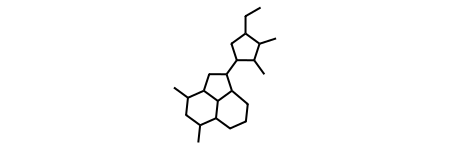

In [25]:
BM_scaf0

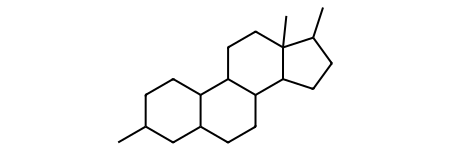

In [26]:
BM_scaf1

In [27]:
# step 2

BM_scaf0_smiles = Chem.MolToSmiles(MurckoScaffold.GetScaffoldForMol(BM_scaf0))
BM_scaf1_smiles = Chem.MolToSmiles(MurckoScaffold.GetScaffoldForMol(BM_scaf1))

BM_scaf0_mol = Chem.MolFromSmiles(BM_scaf0_smiles)
BM_scaf1_mol = Chem.MolFromSmiles(BM_scaf1_smiles)

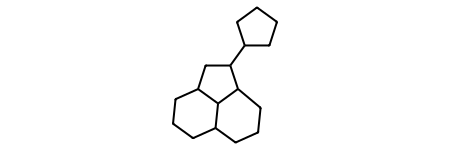

In [28]:
BM_scaf0_mol

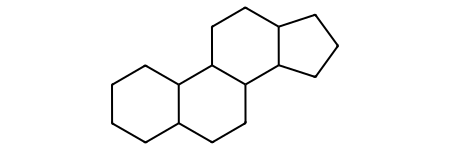

In [29]:
BM_scaf1_mol

In [30]:
# Step 3 : Get the MCS between two molecules based on BM scaffold
mols = [BM_scaf0_mol, BM_scaf1_mol]
MCS_results3 = rdFMCS.FindMCS(mols,
                             atomCompare=rdFMCS.AtomCompare.CompareElements,
                             bondCompare=rdFMCS.BondCompare.CompareOrder,
                            #  ringMatchesRingOnly=True,
                            #  completeRingsOnly=True,

                            #   ringCompare = rdFMCS.ringCompare.IgnoreRingFusion,
                            #   matchValences=True,
                            #   matchChiralTag=True
                              )

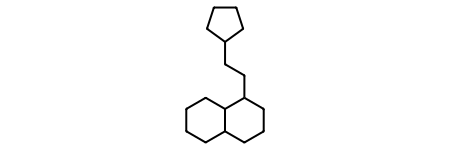

In [31]:
Chem.MolFromSmarts(MCS_results3.smartsString)